#  Convolutional Neural Network

In [1]:
import keras 
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

from dataset_hoda import load_hoda

In [2]:
#load dataset
X_train_original, y_train_original, X_test_original, y_test_original = load_hoda(training_sample_size=5000,
                                                                                 test_sample_size=1000,
                                                                                 size = 28)

In [17]:
#preprocessing

''' input data in numpy array format'''
X_train = np.array(X_train_original)
X_test = np.array(X_test_original)


''' normalize our data values to the range [0, 1]'''
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train = X_train/ 255.0
X_test = X_test  / 255.0

# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# preprocessing class labels
y_train = keras.utils.to_categorical(y_train_original)
y_test = keras.utils.to_categorical(y_test_original)

In [4]:
# test and validation set
X_validation = X_train[:1000]
y_validation = y_train[:1000]

X_train = X_train[1000:]
y_train = y_train[1000:]

In [13]:
# 5. Define model architecture

model = Sequential()
model.add(Conv2D(32, (2, 2),activation = "relu", padding = "same" , input_shape = (28, 28, 1)))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))
model.add(Conv2D(64, (2, 2), activation = "relu", padding="same"))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))
model.add(Conv2D(128, (2, 2), activation="relu", padding= "same"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 128)        

In [14]:
# Compile Model
adam = Adam(lr = 0.003)
model.compile(loss = "categorical_crossentropy", optimizer=adam, metrics=["acc"])

In [15]:
# Fit Model on Training Data
history = model.fit(X_train, y_train,
          validation_data=(X_validation, y_validation),
          shuffle=True, 
          epochs=100, 
          batch_size=256)

Epoch 1/100
16/16 [==============================] - 6s 343ms/step - loss: 1.6225 - acc: 0.4150 - val_loss: 0.4029 - val_acc: 0.8940
Epoch 2/100
16/16 [==============================] - 6s 363ms/step - loss: 0.4482 - acc: 0.8497 - val_loss: 0.1982 - val_acc: 0.9410
Epoch 3/100
16/16 [==============================] - 6s 354ms/step - loss: 0.2799 - acc: 0.9048 - val_loss: 0.1509 - val_acc: 0.9590
Epoch 4/100
16/16 [==============================] - 6s 402ms/step - loss: 0.1862 - acc: 0.9367 - val_loss: 0.1080 - val_acc: 0.9690
Epoch 5/100
16/16 [==============================] - 6s 356ms/step - loss: 0.1625 - acc: 0.9455 - val_loss: 0.0972 - val_acc: 0.9740
Epoch 6/100
16/16 [==============================] - 6s 348ms/step - loss: 0.1255 - acc: 0.9588 - val_loss: 0.0882 - val_acc: 0.9790
Epoch 7/100
16/16 [==============================] - 5s 328ms/step - loss: 0.1154 - acc: 0.9604 - val_loss: 0.0736 - val_acc: 0.9740
Epoch 8/100
16/16 [==============================] - 6s 353ms/step - 

16/16 [==============================] - 6s 364ms/step - loss: 0.0200 - acc: 0.9914 - val_loss: 0.0476 - val_acc: 0.9850
Epoch 63/100
16/16 [==============================] - 5s 337ms/step - loss: 0.0193 - acc: 0.9940 - val_loss: 0.0487 - val_acc: 0.9870
Epoch 64/100
16/16 [==============================] - 5s 319ms/step - loss: 0.0108 - acc: 0.9965 - val_loss: 0.0575 - val_acc: 0.9860
Epoch 65/100
16/16 [==============================] - 5s 318ms/step - loss: 0.0164 - acc: 0.9927 - val_loss: 0.0538 - val_acc: 0.9870
Epoch 66/100
16/16 [==============================] - 6s 396ms/step - loss: 0.0142 - acc: 0.9956 - val_loss: 0.0600 - val_acc: 0.9870
Epoch 67/100
16/16 [==============================] - 6s 370ms/step - loss: 0.0175 - acc: 0.9937 - val_loss: 0.0559 - val_acc: 0.9860
Epoch 68/100
16/16 [==============================] - 6s 374ms/step - loss: 0.0113 - acc: 0.9977 - val_loss: 0.0513 - val_acc: 0.9880
Epoch 69/100
16/16 [==============================] - 6s 356ms/step - loss:

In [18]:
#Evaluate Model
loss, acc = model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 14ms/step - loss: 0.0916 - acc: 0.9800


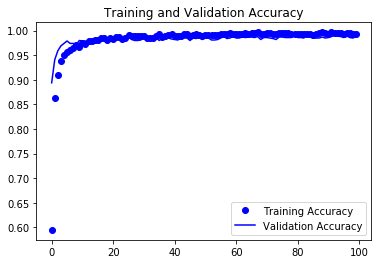

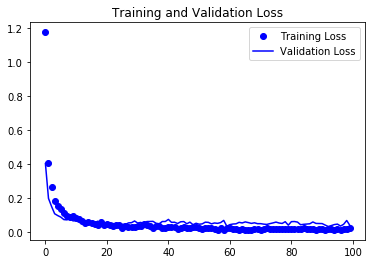

In [21]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))
plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()